In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: preprocesamiento y modelos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import linear_model

# Métricas
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    classification_report, confusion_matrix, silhouette_score
)


"""
    Introducción:
        Realice los otros 2 ejercicios de la prueba tecnica (Aunque si, habia que hacer una y luego la 3, pero preferia practicar con las 3), al haber visto los 2 datasets me fui por el censorial
        puesto que fue al que menos datos tuve que limpiar, ¿habra sido una buena elección?, pues con los resultados que se muestran en el Notebook se vera, el problema general se divide en 2 grandes 
        niveles, Análisis estadistico y Machine Learning, cada uno con sus subtareas, ¿los datos explicaran alguna tendencia?, ¿las estadisticas mostrarán información valiosa que se pueda interpretar?,
        ¿los datos podrán predecirse con una regresión simple?.
    Desarrollo:
        La limpieza de los datos fue desarrollada en el Ejercicio numero 2, donde se arreglaron las variables categoricas que no estaban bien escritas.
        Luego de hacer el analisis, puedo decir que son datos aleatorios dentro unos margenes, esto afectará negativamente tanto los modelos clasificatorios como de regresión,puesto que
        al ser aleatorio no hay una tendencia que se pueda medir. He de decir que no se presentaron outliers que puedan afectar a los modelos, por lo que tampoco se utilizo un intervalo de 
        confianza, lo que si al ser varias de las variables de tipo categoricas, se utilizaron dos tipos de encoder, OneHotEncoder y OrdinalEncoder para poder hacer las regresion como la clasificación
        además del clustering.

    Conclusión:
        Efectivamente los valores entregados por los modelos fueron pesimos, dando los mejores valores la predicción de los servicios basicos (Daban 0.50 de accurancy), pero al ser solo dos
        variables a predecir, podemos decir que es meramente azaroso el resultado y nada concluyente, los valores R*2 aunque se mantienen positivos son insignificante y traducidos e redondeados
        a 0, que no explica nada, (R*2 mas cercano a 1 es lo que buscaba), en el clustering con un silhoutte de 0.1 , es lo que mejor resulto, generando que los datos no están tan apretados entre sí
        aunque sigue siendo un valor bajo, podemos verlo con optimismo despues del todos los resultados anteriores, y por tiempo no pude realizar el sistema de recomendación puesto que se presento
        un imprevisto durante el tiempo que realice esta prueba.

        Bonus:

            Como pude observar y escribi los datos se presentan de forma aleatoria en la mayoria de los casos que observe, por lo que no hay un sesgo en los datos en sí, más que el
            intervalo en lo que fueron creados, a terminos personales, el la utilización de Machine Learning en la creación de las politicas públicas puede ser de mucha ayuda, pero
            como todo lo bueno hay que tomarlo con pinzas, puesto que sigue habiendo un porcentaje de error aunque el modelo este muy bien entrenado o dando un valor bueno, por lo que 
            hay que calcular de cuanto seria los costes tanto de lo FN, FP, para poder entregar respuesta a las politicas públicas de forma eficaz con los recursos.


        Quedo atento ante cualquier noticia, y muchas gracias por la oportunidad.


"""


'\n    Introducción:\n        Realice los otros 2 ejercicios de la prueba tecnica (Aunque si, habia que hacer una y luego la 3, pero preferia practicar con las 3), al haber visto los 2 datasets me fui por el censorial\n        puesto que fue al que menos datos tuve que limpiar, ¿habra sido una buena elección?, pues con los resultados que se muestran en el Notebook se vera, el problema general se divide en 2 grandes \n        niveles, Análisis estadistico y Machine Learning, cada uno con sus subtareas, ¿los datos explicaran alguna tendencia?, ¿las estadisticas mostrarán información valiosa que se pueda interpretar?,\n        ¿los datos podrán predecirse con una regresión simple?.\n    Desarrollo:\n        La limpieza de los datos fue desarrollada en el Ejercicio numero 2, donde se arreglaron las variables categoricas que no estaban bien escritas.\n        Luego de hacer el analisis, puedo decir que son datos aleatorios dentro unos margenes, esto afectará negativamente tanto los modelos 

In [64]:
df = pd.read_csv("datos_viviendas_censo_cleaned.csv")

In [66]:
#PCA

In [68]:
columnas_socio_vivienda = [
    'tipo_vivienda', 'num_dormitorios', 'num_banos', 'superficie_m2', 'ano_construccion',
    'material_paredes', 'material_techo', 'tenencia_vivienda', 'num_personas_hogar',
    'ingreso_mensual_hogar','jefe_hogar_sexo', 'jefe_hogar_educacion'
]
df_pca = df[columnas_socio_vivienda].copy()

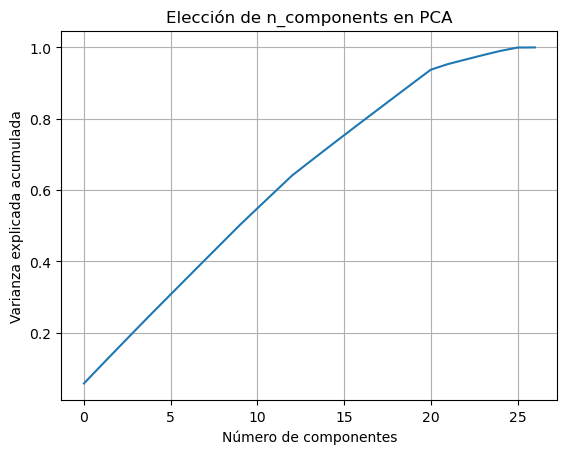

In [70]:
df_numerico = pd.get_dummies(df_pca, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numerico)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
plt.plot(varianza_acumulada)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Elección de n_components en PCA')
plt.grid()
plt.show()
#La curva se aplana entre 20 y 25 por lo que el numero de componentes que vamos a utilizar es 20

In [72]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numerico)
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

Varianza explicada por cada componente: [0.05824143 0.05068224 0.05021761 0.05003208 0.04951575 0.04903551
 0.04892703 0.04879746 0.04866099 0.04865803 0.04624321 0.0459669
 0.04591086 0.0379808  0.03766109 0.03730898 0.03710439 0.03680154
 0.0367635  0.03668724]
Varianza total explicada (22 componentes): 0.9011966488126998


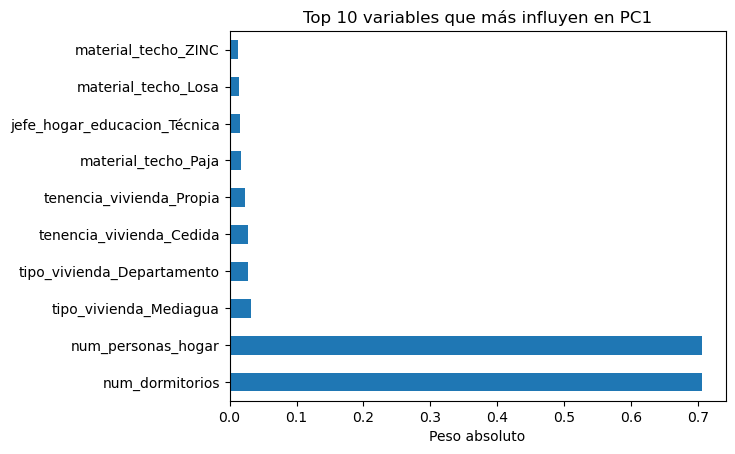

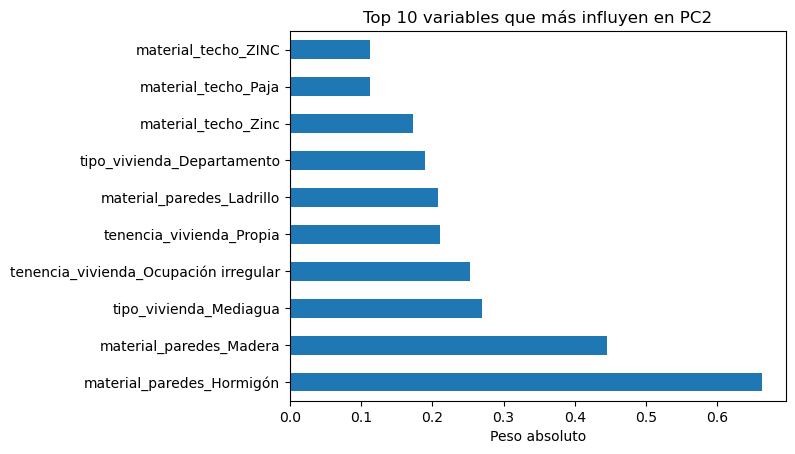

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

componentes = pd.DataFrame(
    pca.components_[:2].T,  # Solo PC1 y PC2, transpuesto para que filas sean variables
    index=df_numerico.columns,
    columns=['PC1', 'PC2']
)
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada (22 componentes):", pca.explained_variance_ratio_.sum())

# Top 10 en PC1
componentes['PC1'].abs().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 variables que más influyen en PC1")
plt.xlabel("Peso absoluto")
plt.show()

# Top 10 en PC2
componentes['PC2'].abs().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 variables que más influyen en PC2")
plt.xlabel("Peso absoluto")
plt.show()


In [82]:
#Correlación

In [84]:
#Columnas a usar
columnas_hogar_vivienda = [
    'tipo_vivienda', 'num_dormitorios', 'num_banos', 'superficie_m2', 'ano_construccion',
    'material_paredes', 'material_techo', 'tenencia_vivienda', 'num_personas_hogar',
    'ingreso_mensual_hogar', 'jefe_hogar_edad', 'jefe_hogar_sexo', 'jefe_hogar_educacion'
]
#Copia el dataframe Original
df_corr = df[columnas_socio_vivienda].copy()

In [86]:
df_numerico_corr = pd.get_dummies(df_corr, drop_first=True)

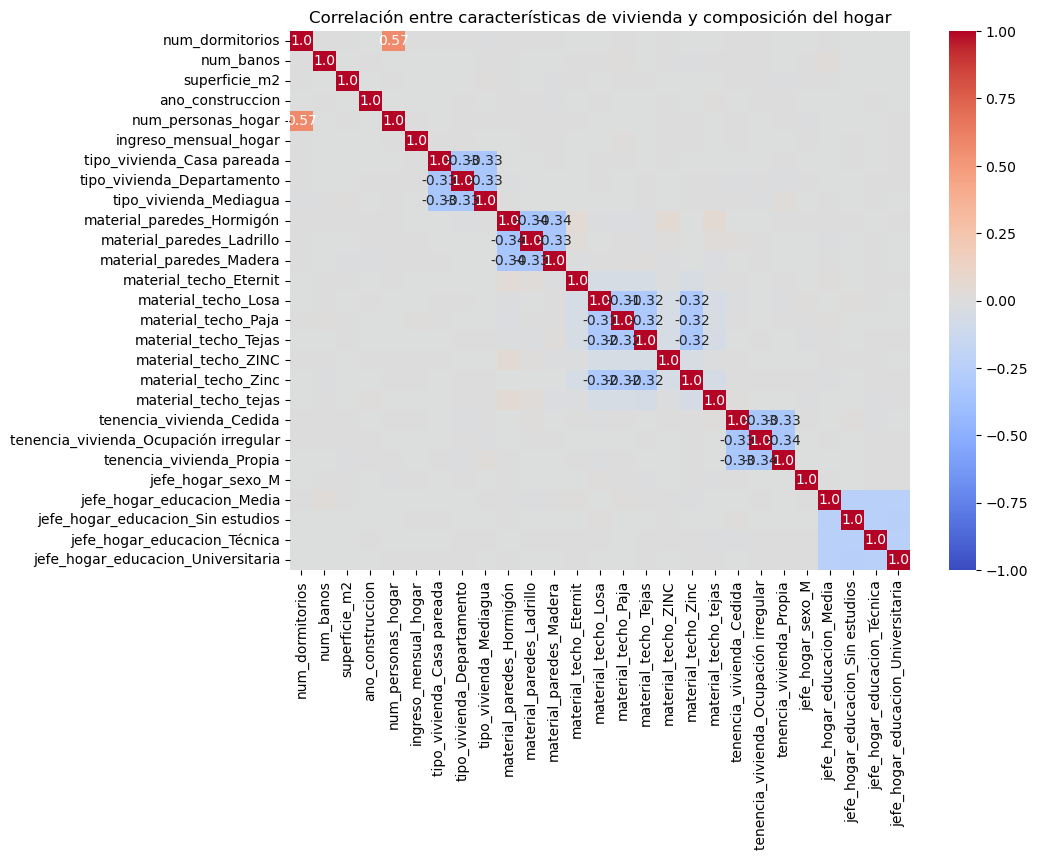

In [88]:
# Calcula la matriz de correlación
corr = df_numerico_corr.corr()

# Crea una máscara para mostrar solo las correlaciones fuertes (por ejemplo, > 0.3 o < -0.3)
threshold = 0.3
mask = corr.abs() < threshold  # True donde NO queremos número

# Crea la matriz de anotaciones: solo números donde la correlación es importante, el resto vacío
annot = corr.round(2).astype(str)
annot = annot.mask(mask, "")

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=annot, fmt='', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlación entre características de vivienda y composición del hogar")
plt.show()

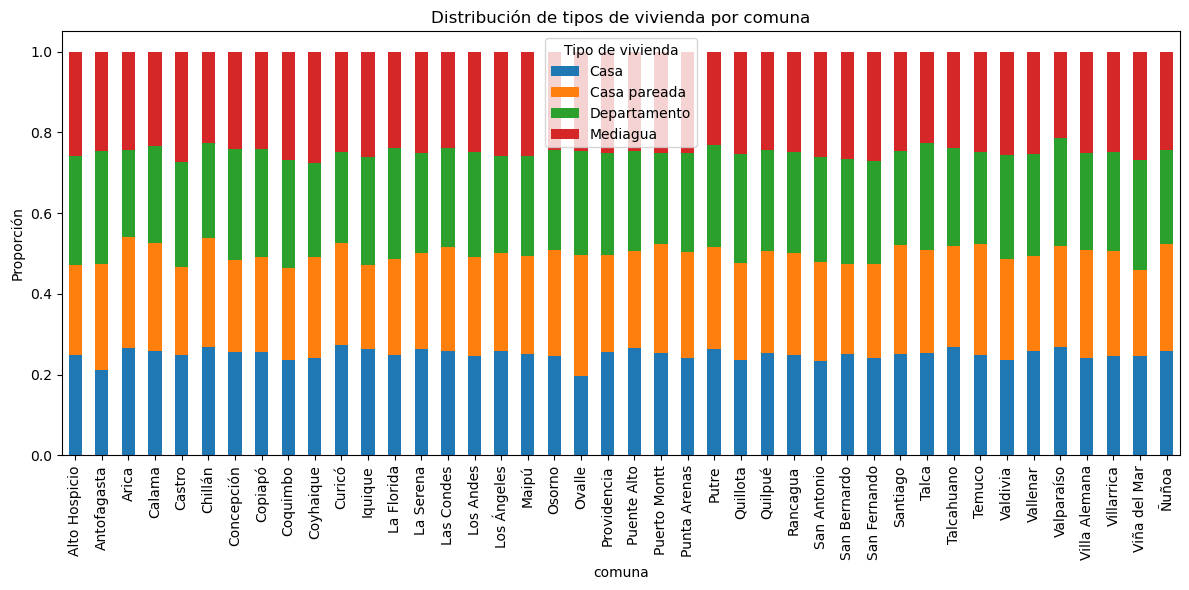

In [28]:
#Análisis espacial de patrones de vivienda por comuna
import matplotlib.pyplot as plt

tabla = pd.crosstab(df['comuna'], df['tipo_vivienda'], normalize='index')  # porcentajes por comuna
tabla.plot(kind='bar', stacked=True, figsize=(12,6))
plt.ylabel("Proporción")
plt.title("Distribución de tipos de vivienda por comuna")
plt.legend(title="Tipo de vivienda")
plt.tight_layout()
plt.show()
#Se puede deducir que los datos presentan una tendencia similar, lo que infiere que los datos están dentro de un intervalo

In [50]:
#Cortamos el DF original para solo utilizar las columnas que queremos
df_modelo = df[['jefe_hogar_edad','ingreso_mensual_hogar', 'num_hombres', 'num_mujeres', 'num_menores_18',
    'num_adultos_18_64', 'num_adultos_65_plus']].dropna()

X = df_modelo.drop(columns='ingreso_mensual_hogar')
y = df_modelo['ingreso_mensual_hogar']
#OneHotEncoder de pandas
X = pd.get_dummies(X, drop_first=True)
#Utilización del split tipico
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Utilizamos un modelo un poco más robusto de regresión como es el Lasso
modelo = linear_model.Lasso(alpha=0.3)
modelo.fit(X_train_scaled, y_train)

y_pred = modelo.predict(X_test_scaled)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R²: -0.0005242459774847941
RMSE: 779014.8115479917


C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.339e+14, tolerance: 1.553e+12
  model = cd_fast.enet_coordinate_descent(
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


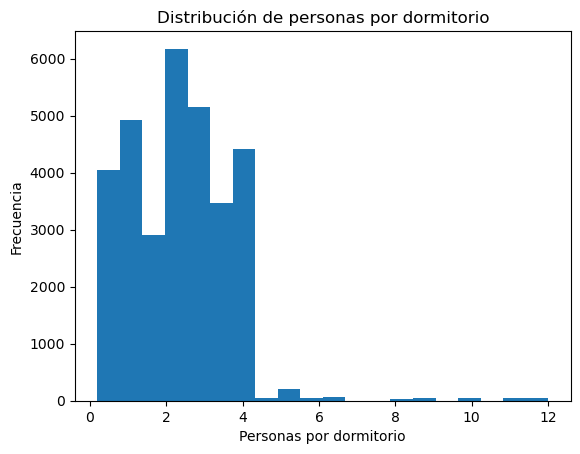

% de hogares en situación de hacinamiento: 51.4%


In [109]:
#Análisis de distribución de personas por dormitorio y factores asociados
personas_por_dormitorio = df['num_personas_hogar'] / df['num_dormitorios']
plt.hist(personas_por_dormitorio, bins=20)
plt.xlabel('Personas por dormitorio')
plt.ylabel('Frecuencia')
plt.title('Distribución de personas por dormitorio')
plt.show()
hacinamiento = (personas_por_dormitorio > 2).mean() * 100
print(f"% de hogares en situación de hacinamiento: {hacinamiento:.1f}%")

In [46]:
#Predicción de ingresos del hogar basado en características de vivienda y composición familiar

In [111]:
# Variables seleccionadas de vivienda y composición familiar
columnas_utiles = [
    'tipo_vivienda', 'superficie_m2', 'ano_construccion', 'material_paredes',
    'material_techo', 'tenencia_vivienda', 'agua_potable', 'electricidad',
    'gas_natural', 'internet', 'telefono_fijo', 'vehiculo_propio',
    'num_personas_hogar', 'num_hombres', 'num_mujeres', 'num_menores_18',
    'num_adultos_18_64', 'num_adultos_65_plus'
]

# Separar variable objetivo y predictoras
y = df['ingreso_mensual_hogar']
X = df[columnas_utiles]

# Columnas categóricas
cat_cols = X.select_dtypes(include=['object', 'category']).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Escalar variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {mse**0.5:.2f}")
print(f"R²: {r2:.2f}")

MAE: 677066.90
RMSE: 788412.04
R²: -0.02

Top 10 variables importantes (vivienda + composición familiar):
superficie_m2          0.200919
ano_construccion       0.152769
num_adultos_18_64      0.055234
num_mujeres            0.054913
num_adultos_65_plus    0.053750
num_personas_hogar     0.053596
num_hombres            0.050898
num_menores_18         0.047473
gas_natural_Sí         0.021171
telefono_fijo_Sí       0.020880
dtype: float64


Silhouette Score: 0.1031


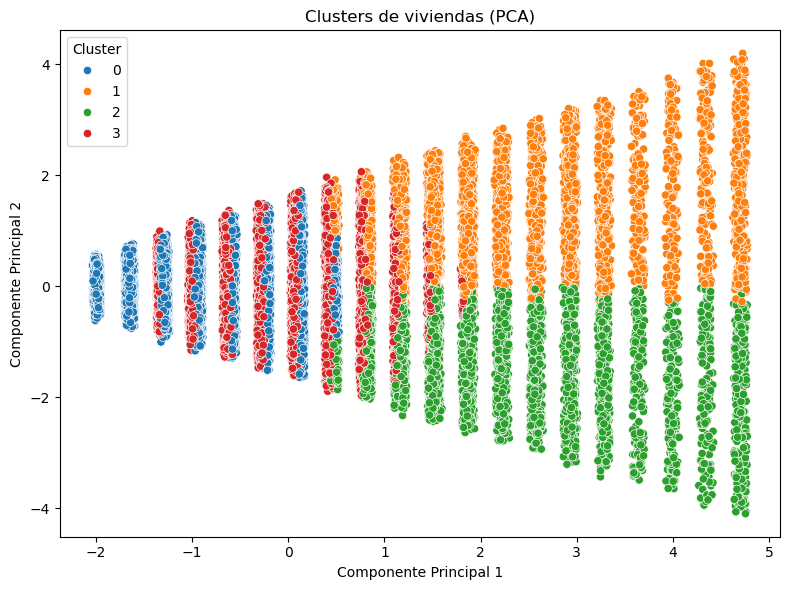


Perfil promedio por cluster:
         superficie_m2  ano_construccion  num_personas_hogar  num_hombres  \
cluster                                                                     
0                114.3            1986.7                 3.0          1.5   
1                113.9            1986.2                13.1         10.1   
2                114.4            1986.2                13.2          2.7   
3                114.5            1986.8                 6.1          3.1   

         num_mujeres  num_menores_18  num_adultos_18_64  num_adultos_65_plus  \
cluster                                                                        
0                1.5             0.8                1.1                  1.1   
1                3.0             1.8                5.8                  5.6   
2               10.5             1.8                5.8                  5.6   
3                3.1             3.2                1.5                  1.5   

         ingreso_mensual_h

In [54]:

# Variables seleccionadas de vivienda y composición familiar
columnas_utiles = ['superficie_m2', 'ano_construccion', 'material_paredes',
    'material_techo', 'tenencia_vivienda',
    'num_personas_hogar', 'num_hombres', 'num_mujeres', 'num_menores_18',
    'num_adultos_18_64', 'num_adultos_65_plus',
    'ingreso_mensual_hogar'
]


# Subset con esas columnas
df_cluster = df[columnas_utiles].copy()

# Identificar columnas categóricas
cat_cols = df_cluster.select_dtypes(include='object').columns
# Codificar variables categóricas con OrdinalEncoder
encoder = OrdinalEncoder()
df_cluster[cat_cols] = encoder.fit_transform(df_cluster[cat_cols])

# Escalar todas las variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Reducción de dimensiones para visualización
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Clustering con KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)
df['cluster'] = clusters

# Silhouette score
score = silhouette_score(df_scaled, clusters)
print(f"Silhouette Score: {score:.4f}")

# Visualización de clusters en PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=clusters, palette='tab10')
plt.title('Clusters de viviendas (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Estadísticas descriptivas por cluster
perfil_cluster = df.groupby('cluster')[[
    'superficie_m2', 'ano_construccion', 'num_personas_hogar',
    'num_hombres', 'num_mujeres', 'num_menores_18', 'num_adultos_18_64',
    'num_adultos_65_plus', 'ingreso_mensual_hogar']
].mean().round(1)

print("\nPerfil promedio por cluster:")
print(perfil_cluster)

# Conteo por cluster
print("\nCantidad de viviendas por cluster:")
print(df['cluster'].value_counts())

In [ ]:
#Clasificación de viviendas por tipo o nivel socioeconómico


Classification Report:
              precision    recall  f1-score   support

        Casa       0.27      0.28      0.27      1597
Casa pareada       0.24      0.24      0.24      1570
Departamento       0.28      0.27      0.27      1608
    Mediagua       0.23      0.22      0.23      1556

    accuracy                           0.25      6331
   macro avg       0.25      0.25      0.25      6331
weighted avg       0.25      0.25      0.25      6331


Matriz de Confusión:


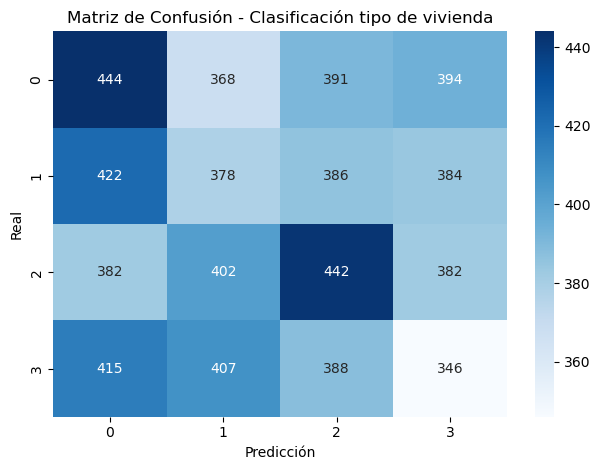

In [56]:
# Eliminar filas con ingresos faltantes o tipo de vivienda faltante
y = df['tipo_vivienda']

# Variables predictoras socioeconómicas y físicas (sin la variable objetivo)
columnas_predictoras = [
    'superficie_m2', 'ano_construccion', 'material_paredes',
    'material_techo','num_personas_hogar','ingreso_mensual_hogar'
]

X = df[columnas_predictoras].copy()

# Codificar variables categóricas
cat_cols = X.select_dtypes(include='object').columns
encoder = OrdinalEncoder()
X[cat_cols] = encoder.fit_transform(X[cat_cols])

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelo de clasificación
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Evaluación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Clasificación tipo de vivienda')
plt.tight_layout()
plt.show()



Reporte de clasificación para el acceso a: agua_potable
              precision    recall  f1-score   support

         0.0       0.50      0.51      0.51      3198
         1.0       0.49      0.48      0.48      3133

    accuracy                           0.50      6331
   macro avg       0.50      0.50      0.50      6331
weighted avg       0.50      0.50      0.50      6331


Matriz de Confusión:


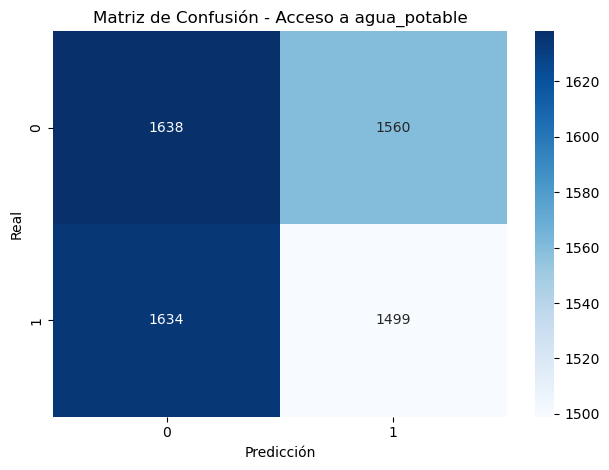


Reporte de clasificación para el acceso a: electricidad
              precision    recall  f1-score   support

         0.0       0.50      0.53      0.51      3219
         1.0       0.48      0.45      0.47      3112

    accuracy                           0.49      6331
   macro avg       0.49      0.49      0.49      6331
weighted avg       0.49      0.49      0.49      6331


Matriz de Confusión:


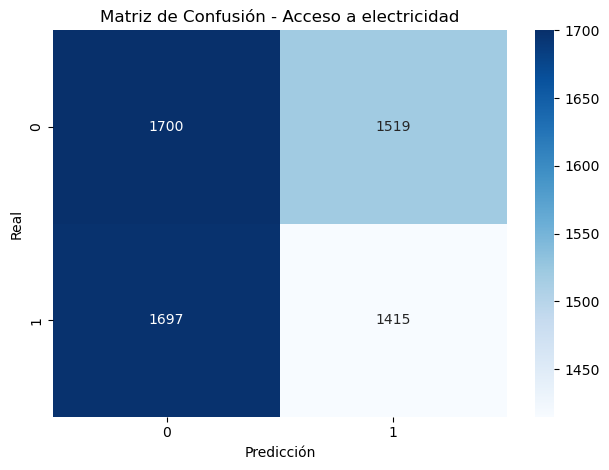


Reporte de clasificación para el acceso a: gas_natural
              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50      3143
         1.0       0.51      0.51      0.51      3188

    accuracy                           0.50      6331
   macro avg       0.50      0.50      0.50      6331
weighted avg       0.50      0.50      0.50      6331


Matriz de Confusión:


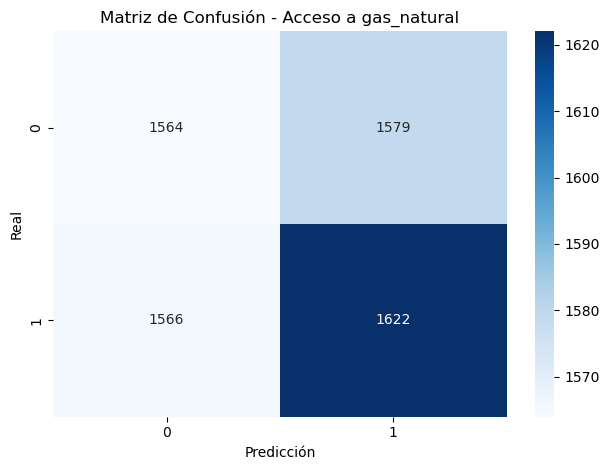


Reporte de clasificación para el acceso a: internet
              precision    recall  f1-score   support

         0.0       0.48      0.49      0.48      3052
         1.0       0.51      0.50      0.50      3279

    accuracy                           0.49      6331
   macro avg       0.49      0.49      0.49      6331
weighted avg       0.49      0.49      0.49      6331


Matriz de Confusión:


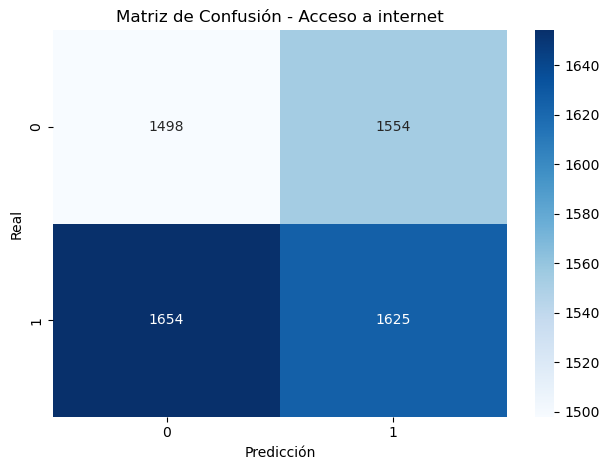


Reporte de clasificación para el acceso a: telefono_fijo
              precision    recall  f1-score   support

         0.0       0.51      0.51      0.51      3215
         1.0       0.49      0.48      0.49      3116

    accuracy                           0.50      6331
   macro avg       0.50      0.50      0.50      6331
weighted avg       0.50      0.50      0.50      6331


Matriz de Confusión:


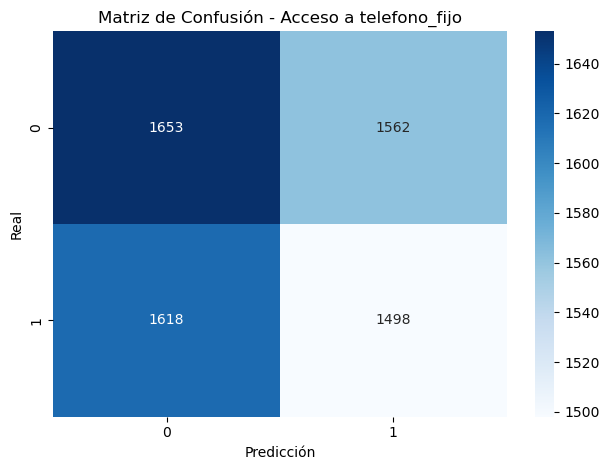

In [90]:
# Eliminar filas con valores faltantes en servicios
servicios = ['agua_potable', 'electricidad', 'gas_natural', 'internet', 'telefono_fijo']
# Variables objetivo: acceso a servicios (una por una)
for servicio in servicios:
    servicio_objetivo = servicio  # Cambiar para predecir otro servicio
    
    # Variables predictoras
    columnas_predictoras = [
        'tenencia_vivienda', 'vehiculo_propio',
        'num_personas_hogar', 'num_hombres', 'num_mujeres', 'num_menores_18',
        'num_adultos_18_64', 'num_adultos_65_plus',
        'ingreso_mensual_hogar'
    ]
    
    X = df[columnas_predictoras].copy()
    y = df[servicio_objetivo]
    
    # Codificar variables categóricas
    cat_cols = X.select_dtypes(include='object').columns
    encoder = OrdinalEncoder()
    X[cat_cols] = encoder.fit_transform(X[cat_cols])
    
    # Codificar la variable objetivo
    if y.dtype == 'object':
        y = OrdinalEncoder().fit_transform(y.values.reshape(-1, 1)).ravel()
    
    # Escalar
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Dividir en train/test
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Modelo de clasificación
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Predicciones
    y_pred = clf.predict(X_test)
    
    # Evaluación
    print(f"\nReporte de clasificación para el acceso a: {servicio_objetivo}")
    print(classification_report(y_test, y_pred))
    
    print("\nMatriz de Confusión:")
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - Acceso a {servicio_objetivo}')
    plt.tight_layout()
    plt.show()